# Section 1

In [1]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import *
from sklearn.linear_model import LinearRegression

In [2]:
def covid_sp_cases_v_deaths(dataset, datasetname):
    # get cases and deaths for line of best fit
    X = np.array(dataset['cases']).reshape((-1, 1))
    Y = np.array(dataset['deaths']) #.reshape(-1, 1)
    
    model = LinearRegression().fit(X, Y)
    y_line = model.predict(X)
    r_sq = model.score(X, Y)
    
    print(f'The slope of the line: {model.coef_}')
    print(f"coefficient of determination: {r_sq}")
    
    plt.scatter('cases', 'deaths', data=dataset)
    plt.plot(X, y_line, 'r')
    plt.title("Cases vs. Deaths for " + datasetname)
    plt.xlabel("Cases")
    plt.ylabel("Deaths")
    plt.show()

In [3]:
def covid_bar(dataset, granularity, bar_var, datasetname, n=20):
    # Sort data by cases and then plot bar graph of cases
    dataset = dataset.sort_values(by = bar_var, ascending = False)
    dataset = dataset.head(n)
    bar_var_data = dataset[bar_var].to_numpy()
    labels = dataset[granularity]
    plt.yticks(range(len(bar_var_data)), labels)
    plt.ylabel(granularity)
    plt.xlabel(bar_var + " of Covid-19")
    plt.title(datasetname + " " + bar_var + " of Covid-19 by " + granularity)
    plt.barh(range(len(bar_var_data)), bar_var_data)
    plt.show()

# Section 2

In [4]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
covid_data = pd.read_csv(url, sep=",")
covid_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [5]:
url = "https://corgis-edu.github.io/corgis/datasets/csv/county_demographics/county_demographics.csv"
county_data = pd.read_csv(url, sep=",")
county_data.head()

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,...,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,...,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,...,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,...,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,...,13.5,-1,63002,914,304,499,0,861,185,679


# Section 3

In [6]:
display(covid_data.dtypes)

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [7]:
# convert date column from object type to datetime type
covid_data["date"] = pd.to_datetime(covid_data["date"], infer_datetime_format = True)
# convert date column from datetime type to the date format matplotlib uses
covid_data["date2"] = mpl.dates.date2num(covid_data["date"])
# check that the conversion of date column from object to datetime and datetime to float (for date2) went through correctly
display(covid_data.dtypes)

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths           float64
date2            float64
dtype: object

In [8]:
# get the latest date in the dataset and look at it
latest_date = covid_data["date2"].max()
# get the index of the latest row
latest_row = len(covid_data) - 1
# print these global variables
print("Latest Date: " + str(latest_date))
print("Latest Row: " + str(latest_row))

Latest Date: 19125.0
Latest Row: 2502831


In [9]:
latest_covid_data = covid_data[covid_data["date2"] == latest_date]
latest_covid_data.head()

,date,county,state,fips,cases,deaths,date2
2499574,2022-05-13,Autauga,Alabama,1001.0,15863,216.0,19125.0
2499575,2022-05-13,Baldwin,Alabama,1003.0,55862,681.0,19125.0
2499576,2022-05-13,Barbour,Alabama,1005.0,5681,98.0,19125.0
2499577,2022-05-13,Bibb,Alabama,1007.0,6457,105.0,19125.0
2499578,2022-05-13,Blount,Alabama,1009.0,15005,243.0,19125.0


In [10]:
latest_covid_data['deaths_per_case'] = 0
latest_covid_data['deaths_per_case'].where(~(latest_covid_data.cases > 0), other=latest_covid_data.deaths / latest_covid_data.cases, inplace=True)
latest_covid_data.head()

C:\Users\harde\AppData\Local\Temp\ipykernel_25980\1206898279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_covid_data['deaths_per_case'] = 0
C:\Users\harde\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,date,county,state,fips,cases,deaths,date2,deaths_per_case
2499574,2022-05-13,Autauga,Alabama,1001.0,15863,216.0,19125.0,0.013617
2499575,2022-05-13,Baldwin,Alabama,1003.0,55862,681.0,19125.0,0.012191
2499576,2022-05-13,Barbour,Alabama,1005.0,5681,98.0,19125.0,0.017250
2499577,2022-05-13,Bibb,Alabama,1007.0,6457,105.0,19125.0,0.016261
2499578,2022-05-13,Blount,Alabama,1009.0,15005,243.0,19125.0,0.016195


# Section 4

In [11]:
states_covid_data = latest_covid_data.groupby(['state'])['cases', 'deaths'].sum().reset_index()
states_covid_data['deaths_per_case'] = 0
states_covid_data['deaths_per_case'].where(~(states_covid_data.cases > 0), other=states_covid_data.deaths / states_covid_data.cases, inplace=True)
states_covid_data.head()

C:\Users\harde\AppData\Local\Temp\ipykernel_25980\2154606737.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  states_covid_data = latest_covid_data.groupby(['state'])['cases', 'deaths'].sum().reset_index()


,state,cases,deaths,deaths_per_case
0,Alabama,1304710,19628.0,0.015044
1,Alaska,254467,1228.0,0.004826
2,American Samoa,5930,30.0,0.005059
3,Arizona,2030925,30230.0,0.014885
4,Arkansas,838251,11415.0,0.013618


The slope of the line: [0.01165678]
coefficient of determination: 0.954559559059236


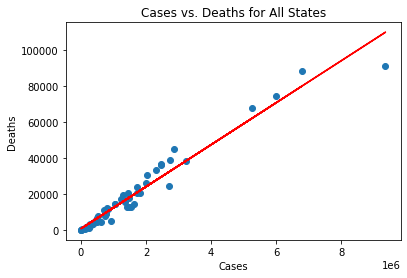

In [12]:
covid_sp_cases_v_deaths(states_covid_data, "All States")

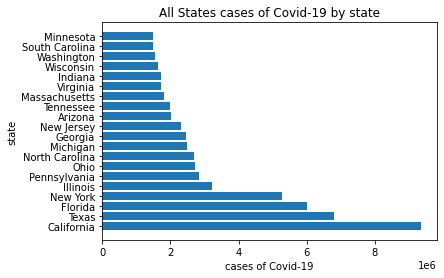

In [13]:
covid_bar(states_covid_data, "state", "cases", "All States")

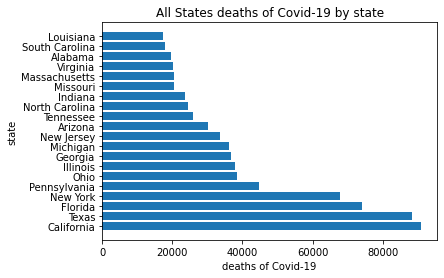

In [14]:
covid_bar(states_covid_data, "state", "deaths", "All States")

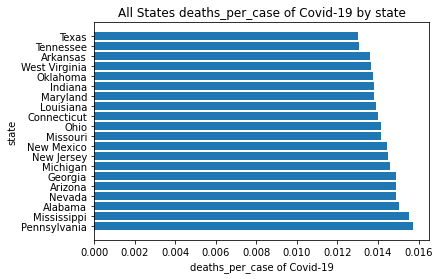

In [15]:
covid_bar(states_covid_data, "state", "deaths_per_case", "All States")

# Section 5

In [16]:
Texas_covid_data = latest_covid_data[latest_covid_data['state'] == 'Texas']
Texas_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2502206,2022-05-13,Anderson,Texas,48001.0,9691,239.0,19125.0,0.024662
2502207,2022-05-13,Andrews,Texas,48003.0,3822,72.0,19125.0,0.018838
2502208,2022-05-13,Angelina,Texas,48005.0,15501,481.0,19125.0,0.031030
2502209,2022-05-13,Aransas,Texas,48007.0,4177,86.0,19125.0,0.020589
2502210,2022-05-13,Archer,Texas,48009.0,2213,28.0,19125.0,0.012653


The slope of the line: [0.01078223]
coefficient of determination: 0.9607306447812559


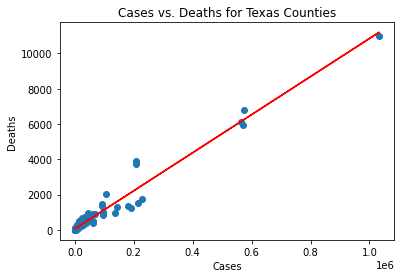

In [17]:
covid_sp_cases_v_deaths(Texas_covid_data, "Texas Counties")

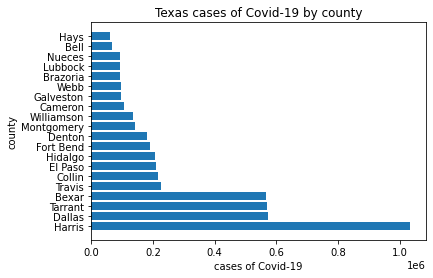

In [18]:
covid_bar(Texas_covid_data, "county", "cases", "Texas")

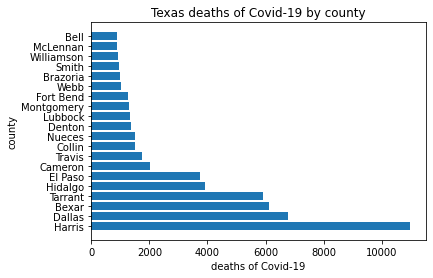

In [19]:
covid_bar(Texas_covid_data, "county", "deaths", "Texas")

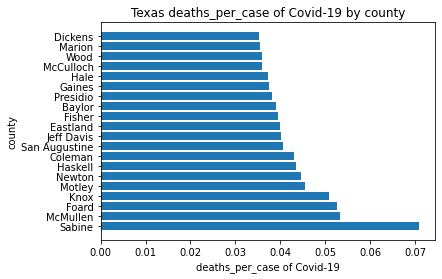

In [20]:
covid_bar(Texas_covid_data, "county", "deaths_per_case", "Texas")

# Section 6

In [21]:
ga_covid_data = latest_covid_data[latest_covid_data['state'] == 'Georgia']
ga_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2499965,2022-05-13,Appling,Georgia,13001.0,4833,128.0,19125.0,0.026485
2499966,2022-05-13,Atkinson,Georgia,13003.0,2200,50.0,19125.0,0.022727
2499967,2022-05-13,Bacon,Georgia,13005.0,3692,78.0,19125.0,0.021127
2499968,2022-05-13,Baker,Georgia,13007.0,536,15.0,19125.0,0.027985
2499969,2022-05-13,Baldwin,Georgia,13009.0,9574,240.0,19125.0,0.025068


The slope of the line: [0.0103307]
coefficient of determination: 0.9351861977504092


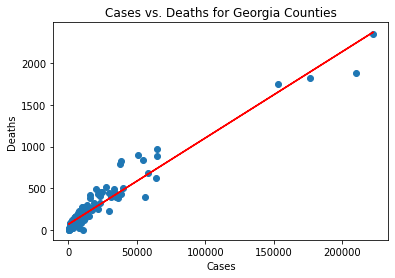

In [22]:
covid_sp_cases_v_deaths(ga_covid_data, "Georgia Counties")

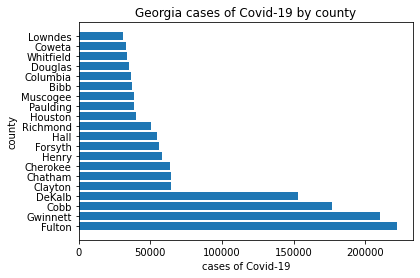

In [23]:
covid_bar(ga_covid_data, "county", "cases", "Georgia")

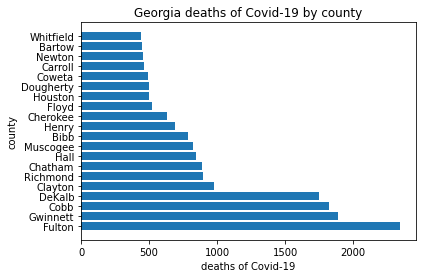

In [24]:
covid_bar(ga_covid_data, "county", "deaths", "Georgia")

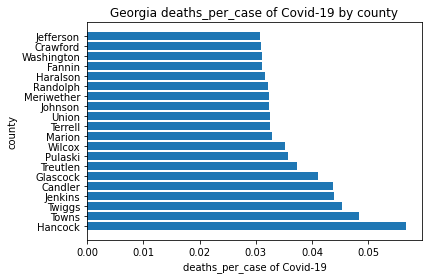

In [25]:
covid_bar(ga_covid_data, "county", "deaths_per_case", "Georgia")

# Section 7

In [26]:
va_covid_data = latest_covid_data[latest_covid_data['state'] == 'Virginia']
va_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2502509,2022-05-13,Accomack,Virginia,51001.0,7054,106.0,19125.0,0.015027
2502510,2022-05-13,Albemarle,Virginia,51003.0,18671,163.0,19125.0,0.008730
2502511,2022-05-13,Alexandria city,Virginia,51510.0,32647,188.0,19125.0,0.005759
2502512,2022-05-13,Alleghany,Virginia,51005.0,3364,98.0,19125.0,0.029132
2502513,2022-05-13,Amelia,Virginia,51007.0,2683,61.0,19125.0,0.022736


The slope of the line: [0.00814264]
coefficient of determination: 0.902520442062019


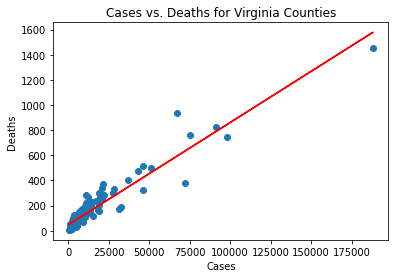

In [27]:
covid_sp_cases_v_deaths(va_covid_data, "Virginia Counties")

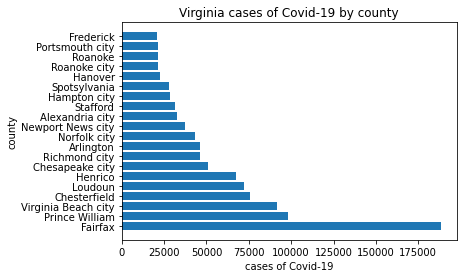

In [28]:
covid_bar(va_covid_data, "county", "cases", "Virginia")

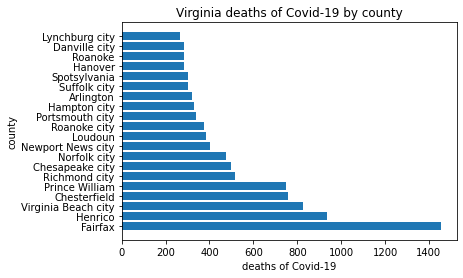

In [29]:
covid_bar(va_covid_data, "county", "deaths", "Virginia")

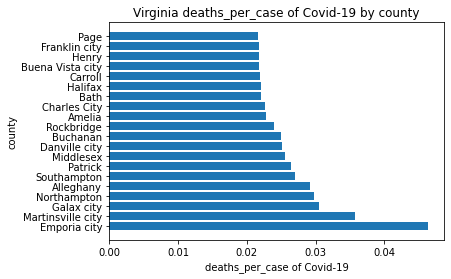

In [30]:
covid_bar(va_covid_data, "county", "deaths_per_case", "Virginia")

# Section 8

In [31]:
il_covid_data = latest_covid_data[latest_covid_data['state'] == 'Illinois']
il_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2500176,2022-05-13,Adams,Illinois,17001.0,22525,238.0,19125.0,0.010566
2500177,2022-05-13,Alexander,Illinois,17003.0,1288,15.0,19125.0,0.011646
2500178,2022-05-13,Bond,Illinois,17005.0,4370,37.0,19125.0,0.008467
2500179,2022-05-13,Boone,Illinois,17007.0,14162,130.0,19125.0,0.009179
2500180,2022-05-13,Brown,Illinois,17009.0,2430,21.0,19125.0,0.008642


The slope of the line: [0.01216058]
coefficient of determination: 0.9669531843084318


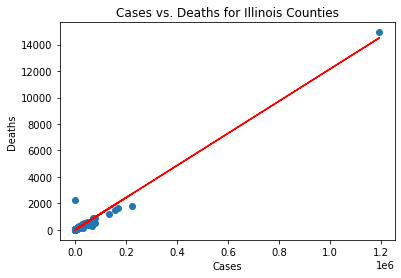

In [32]:
covid_sp_cases_v_deaths(il_covid_data, "Illinois Counties")

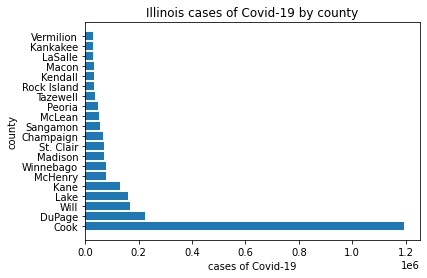

In [33]:
covid_bar(il_covid_data, "county", "cases", "Illinois")

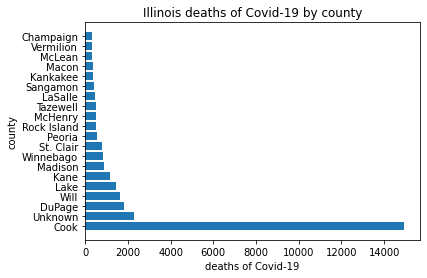

In [34]:
covid_bar(il_covid_data, "county", "deaths", "Illinois")

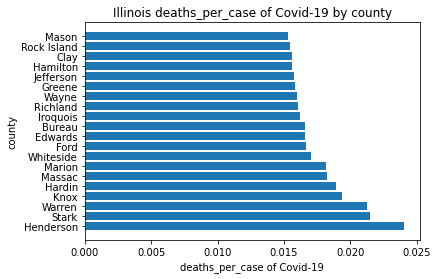

In [35]:
covid_bar(il_covid_data, "county", "deaths_per_case", "Illinois")

# Section 9

In [36]:
penn_covid_data = latest_covid_data[latest_covid_data['state'] == 'Pennsylvania']
penn_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2501846,2022-05-13,Adams,Pennsylvania,42001.0,25114,364.0,19125.0,0.014494
2501847,2022-05-13,Allegheny,Pennsylvania,42003.0,271427,3323.0,19125.0,0.012243
2501848,2022-05-13,Armstrong,Pennsylvania,42005.0,15397,343.0,19125.0,0.022277
2501849,2022-05-13,Beaver,Pennsylvania,42007.0,40744,745.0,19125.0,0.018285
2501850,2022-05-13,Bedford,Pennsylvania,42009.0,11044,275.0,19125.0,0.024900


The slope of the line: [0.01429152]
coefficient of determination: 0.9720963763784565


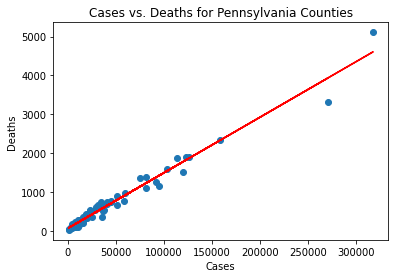

In [37]:
covid_sp_cases_v_deaths(penn_covid_data, "Pennsylvania Counties")

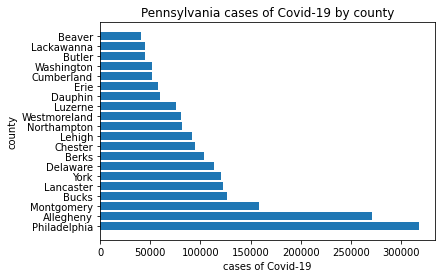

In [38]:
covid_bar(penn_covid_data, "county", "cases", "Pennsylvania")

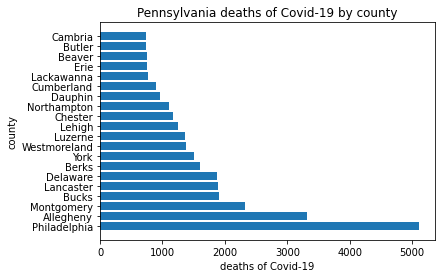

In [39]:
covid_bar(penn_covid_data, "county", "deaths", "Pennsylvania")

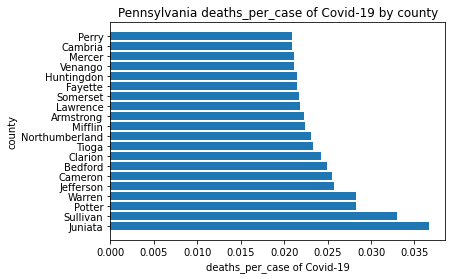

In [40]:
covid_bar(penn_covid_data, "county", "deaths_per_case", "Pennsylvania")